# Data Loading
Load the MNIST dataset using Keras.

In [65]:
# import Necessary Libraries
from tensorflow.keras.datasets import mnist
from tensorflow.keras import Sequential
from tensorflow.keras import layers
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import numpy as np


In [66]:
# Load dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# Display dataset shapes
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")

x_train shape: (60000, 28, 28)
y_train shape: (60000,)
x_test shape: (10000, 28, 28)
y_test shape: (10000,)


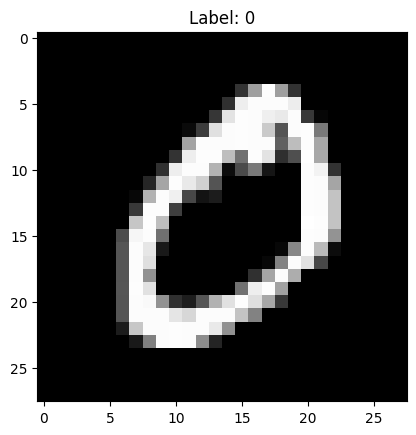

In [67]:
# Basic data visualisation
img = x_train[1,:,:]
label = y_train[1]
plt.imshow(img, cmap="gray")
plt.title(f"Label: {label}")
plt.show()

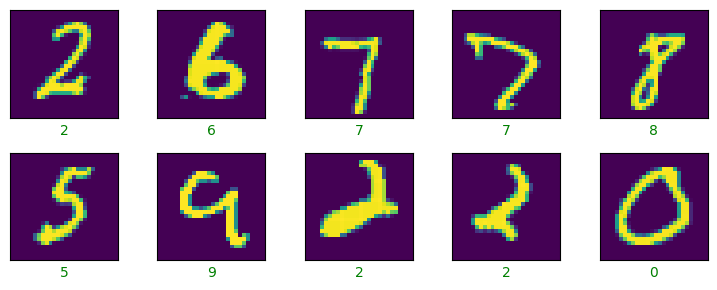

In [68]:
from numpy.random.mtrand import choice
plt.figure(figsize=(8, 3))
for window, i in enumerate(np.random.choice(range(x_train.shape[0]), 10), start=1):
  plt.subplot(2, 5, window)
  plt.imshow(x_train[i])
  plt.xlabel(y_train[i],color='g')
  plt.xticks([])
  plt.yticks([])
  plt.xlabel(y_train[i])
  plt.tight_layout()

In [ ]:
x_train[0].reshape(28,28,1).astype('float32')/255

# Data Preprocessing
Normalize the data and reshape it for CNN input.

In [69]:
# Normalize and reshape
x_train_nom = x_train.reshape(-1, 28, 28, 1).astype('float32') / 255
x_test_nom = x_test.reshape(-1, 28, 28, 1).astype('float32') / 255

# One-hot encode labels
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
# y_train[0],y_train_cat[0]

# Model Building
Build a CNN model using Keras Sequential API.

In [70]:
model = Sequential()
model.add(layers.Conv2D(32, kernel_size=(3, 3), activation='relu',padding='same', input_shape=(28, 28, 1))),
model.add(layers.MaxPooling2D(pool_size=(2, 2))),
model.add(layers.Conv2D(64, kernel_size=(3, 3), activation='relu',padding='same',)),
model.add(layers.MaxPooling2D(pool_size=(2, 2))),
model.add(Flatten()),
model.add(Dense(128, activation='relu')),
model.add(Dense(10, activation='softmax'))


model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 3136)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       401,536 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 421,642 (1.61 MB)

 Trainable params: 421,642 (1.61 MB)

 Non-trainable params: 0 (0.00 B)

# Model Compilation
Compile the model with Adam optimizer and categorical crossentropy loss.

In [71]:
model.compile(optimizer="adam", loss='categorical_crossentropy', metrics=['accuracy'])

# Model Training
Train the model on the training data.

In [72]:
history = model.fit(x_train_nom, y_train_cat, epochs=10, batch_size=128, validation_split=0.2,verbose=1)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.8470 - loss: 0.5180 - val_accuracy: 0.9774 - val_loss: 0.0761
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9802 - loss: 0.0643 - val_accuracy: 0.9838 - val_loss: 0.0536
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9865 - loss: 0.0425 - val_accuracy: 0.9877 - val_loss: 0.0450
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9913 - loss: 0.0289 - val_accuracy: 0.9895 - val_loss: 0.0361
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9933 - loss: 0.0214 - val_accuracy: 0.9872 - val_loss: 0.0455
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9947 - loss: 0.0180 - val_accuracy: 0.9893 - val_loss: 0.0367
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.9954 - loss: 0.0147 - val_accuracy: 0.9873 - val_loss: 0.0448
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - accuracy: 0.9967 - loss: 0.0108 - val_accuracy: 0.

# Model Evaluation
Evaluate the model on the test data.

In [77]:
test_loss, test_accuracy = model.evaluate(x_test_nom, y_test_cat)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_accuracy}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9890 - loss: 0.0384
Test Loss: 0.030424972996115685
Test Accuracy: 0.9914000034332275


# Prediction
Make predictions on new data samples.

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step


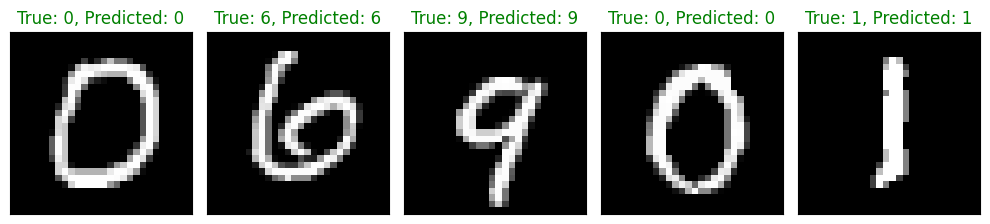

In [78]:
# Predict on a few test samples
predictions = model.predict(x_test[10:15])
predicted_classes = np.argmax(predictions, axis=1)
true_classes = y_test[10:15]

# Display predictions
plt.figure(figsize=(10, 3))
for wind, i in enumerate(range(x_test[10:15].shape[0]), start=1):
    plt.subplot(1, 5, wind)
    plt.imshow(x_test[10:15][i].reshape(28, 28), cmap='gray')
    plt.xticks([])
    plt.yticks([])
    plt.title(f"True: {true_classes[i]}, Predicted: {predicted_classes[i]}", color='g' if true_classes[i] == predicted_classes[i] else 'r')
    plt.tight_layout()
